# Задание взято с [платформы](https://karpov.courses/)
## Описание
На этот раз данные имеют следующую структуру:

- записываются для каждого пользователя, совершившего покупки, каждый день
- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя
- внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
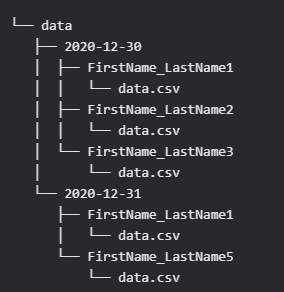


### Задачи
- Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)
- Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.
- Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?
- Визуализируйте продажи по дням.
- Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

### Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date), соответствует названию папки, где лежит папка с пользователем)

В качестве ответа укажите сумму по колонке quantity.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

In [4]:
path_to_data = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-otvetchikov/shared/homeworks/python_ds_miniprojects/4/data/'

In [5]:
full_data = pd.DataFrame()

for date in os.listdir(path_to_data):
    for name in os.listdir(path_to_data+date):
        data = pd.read_csv(path_to_data+date+'/'+name+'/'+'data.csv')
        data['name'] = [name]*len(data)
        data['date'] = pd.to_datetime([date]*len(data)).strftime('%d-%m-%Y')
        full_data = pd.concat([full_data, data])

full_data = full_data.set_index('Unnamed: 0')
full_data.index.name = None
full_data

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,05-12-2020
1,89,1,Petr_Ivanov,05-12-2020
2,33,2,Petr_Ivanov,05-12-2020
3,8,3,Petr_Ivanov,05-12-2020
4,16,1,Petr_Ivanov,05-12-2020
...,...,...,...,...
0,18,4,Petr_Fedorov,07-12-2020
1,94,4,Petr_Fedorov,07-12-2020
0,95,2,Vasiliy_Ivanov,07-12-2020
1,83,3,Vasiliy_Ivanov,07-12-2020


In [6]:
full_data.quantity.sum()

480

### Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [7]:
full_data.groupby('name', as_index=False) \
         .aggregate({'quantity': 'sum'}) \
         .sort_values(['quantity', 'name'], ascending=[False, True])

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52
6,Anton_Smirnov,45
10,Petr_Fedorov,34
7,Kirill_Fedorov,28
16,Rostislav_Petrov,28
19,Vasiliy_Ivanov,27
0,Alexey_Fedorov,24
4,Anton_Ivanov,23
11,Petr_Ivanov,21


### Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [8]:
plot_data_product = full_data.groupby('product_id', as_index=False) \
         .aggregate({'quantity': 'sum'}) \
         .sort_values(['quantity'], ascending=[False])

In [9]:
plot_data_product.iloc[:10]

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


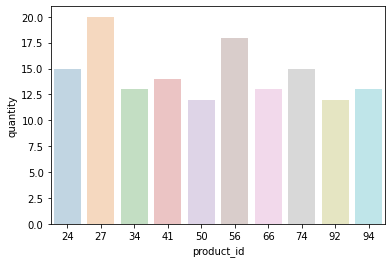

In [10]:
sns.barplot(x=plot_data_product.iloc[:10]['product_id'], y=plot_data_product.iloc[:10]['quantity'], alpha=0.3)

### Визуализируйте продажи по дням.

In [11]:
plot_data_date = full_data.groupby('date', as_index=False) \
         .aggregate({'quantity': 'sum'}) \
         .sort_values(['quantity'], ascending=[False])

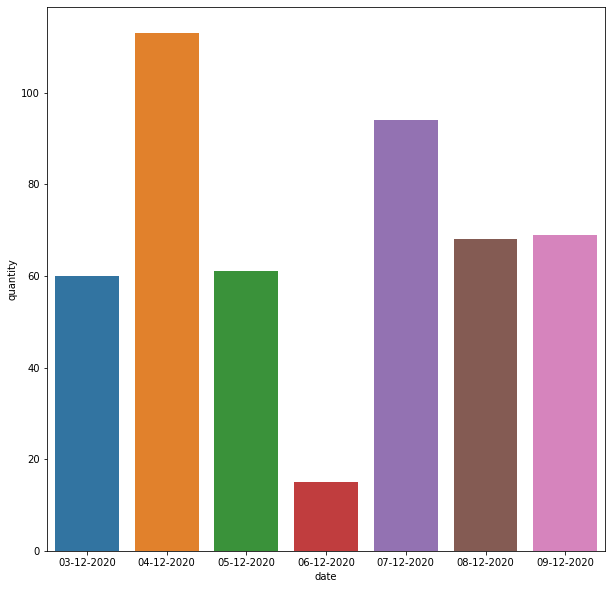

In [12]:
plt.figure(figsize=(10, 10))

sns.barplot(x=plot_data_date['date'], y=plot_data_date['quantity'], order = plot_data_date['date'].sort_values())

### Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни.

In [13]:
full_data.drop_duplicates(['product_id', 'name', 'date']) \
         .groupby(['name', 'product_id'], as_index=[False, False]) \
         .aggregate({'date':'count'}) \
         .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


In [14]:
full_data

,product_id,quantity,name,date
0,27,4,Petr_Ivanov,05-12-2020
1,89,1,Petr_Ivanov,05-12-2020
2,33,2,Petr_Ivanov,05-12-2020
3,8,3,Petr_Ivanov,05-12-2020
4,16,1,Petr_Ivanov,05-12-2020
...,...,...,...,...
0,18,4,Petr_Fedorov,07-12-2020
1,94,4,Petr_Fedorov,07-12-2020
0,95,2,Vasiliy_Ivanov,07-12-2020
1,83,3,Vasiliy_Ivanov,07-12-2020


## Дополнительный проект

### И небольшой минипроект на фильтрацию данных!

Имеется таблица с записями о компаниях, включая их ИНН, и отдельный текстовый файл с набором ИНН (колонка head_inn), которые хранятся в папке 4_inn.

- 4_inn.xls — таблица в экселевском формате
- 4_necessary_inn.txt — перечень необходимых ИНН в текстовом формате

### Задачи:
- извлечь из таблицы записи с ИНН, указанными в текстовом файле
- записать результат в файл selected_inn.csv

In [15]:
path_to_folder = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-n-otvetchikov/shared/homeworks/python_ds_miniprojects/4_inn/'

In [16]:
data = pd.read_excel('4_inn.xls').drop('Unnamed: 0', axis=1)

In [17]:
inn_data = [i.strip() for i in open('4_necessary_inn.txt').readlines()]

In [23]:
filtred_data = pd.DataFrame()

In [28]:
%time

for inn in inn_data:
    filtred_data = pd.concat([filtred_data,data.query('head_inn == {}'.format(inn))])
filtred_data

CPU times: user 13 µs, sys: 4 µs, total: 17 µs
Wall time: 36.5 µs


,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
191,191,АО «Колесников Чернова»,9272097078860,"д. Чегем, бул. Фрунзе, д. 4 стр. 480, 072269",Елизар Бенедиктович Макаров,Хлебороб,394609645484,+7 (919) 194-33-43,ekorolev@rambler.ru,zao.com,1972-11-04,2010-09-16,10663127787,66697733782,Nizhniy Lomov,"г. Медногорск, ул. Спортивная, д. 100 стр. 188...",Развитие беспроводных технологий,10492172735,74379060451
300,300,Татэнергосбыт,2791430065724,"клх Петропавловск-Камчатский, пер. Рабочий, д....",Харлампий Вилорович Вишняков,Стоматолог,281578625230,8 (878) 984-0993,glafira02@gmail.com,porshe.net,2008-07-04,1997-10-16,58039739637,84642103736,Kachkanar,"г. Моршанск, бул. К.Маркса, д. 6 стр. 502, 805420",Охват распределённых интернет-продавцоы,67690003435,99435516274
1509,1509,НПО «Стрелкова»,7110041606978,"ст. Воркута, ул. Ветеранов, д. 11 стр. 1, 723446",Ермаков Андрей Фокич,Банкир,923769811917,8 113 980 22 49,jakovlevzahar@mail.ru,larionova.org,2014-07-08,1991-11-15,99617831657,24465957000,Sharypovo,"п. Каспийск, ш. Союзное, д. 5/7, 120195",Увеличение стратегических интернет-компаний,79277218146,11246420088
2021,2021,ЗАО «Крылова Юдина»,8455918834370,"с. Диксон, бул. Радищева, д. 78, 374235",Терентьев Светозар Германович,Инженер-строитель,998694734508,8 (196) 810-96-47,panovavasilisa@zao.info,oao.biz,1995-05-16,2010-04-21,69873139508,60167526037,Kireyevsk,"с. Одинцово, алл. Гагарина, д. 46 к. 90, 598757",Управление прозрачных инициатив,56953690714,87347393380
1186,1186,Тетра Пак (Tetra Pak),6812089812666,"ст. Санкт-Петербург, пер. Краснознаменный, д. ...",Харлампий Алексеевич Игнатьев,Биоинженер,271011690615,+75128733627,viktor_1980@gmail.com,beljaeva.org,2008-11-26,1976-07-21,65685202778,69271521897,Bavly,"к. Плесецк, пр. Нижний, д. 23, 540525",Ускорение кроссплатформенных технологий,71264569864,57268704622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1218,1218,Деловые линии,1378067001131,"п. Дербент, ш. Подстанция, д. 5/8 к. 8/8, 916215",Аркадий Харитонович Антонов,Андролог,664306216794,86260010162,nina_83@hotmail.com,ooo.edu,1982-11-19,2015-11-20,74403669391,27404232612,Bavly,"г. Егорьевск, пер. Курганный, д. 49 к. 7, 189244",Включение вертикальных парадигм,65347989747,45578881633
493,493,Вольво Карс (Zhejiang Geely),2596408307603,"клх Неплюевка, алл. М.Горького, д. 6/4 к. 70, ...",Филимон Дорофеевич Молчанов,Министр,991951385204,+7 (166) 026-7659,gavrilovevstafi@zao.org,zao.biz,2016-11-20,2020-04-08,59506159070,85705059969,Aykhal,"к. Томск, бул. Коммунальный, д. 48 стр. 7, 013531",Культивация веб-ориентированных моделей,84409177538,49946964483
1901,1901,Крюков Лтд,3148579005179,"клх Сладково, пр. Кубанский, д. 2/4 стр. 8, 36...",Никандр Харлампьевич Павлов,Кузнец,129413497752,+74919400310,kornilovaanna@mail.ru,chtpz.com,1988-01-31,1971-06-20,67298097618,53414631957,Nizhniy Lomov,"ст. Калач, ш. Лермонтова, д. 7 стр. 39, 244448",Распределение эффективных приложений,46611462822,84613297768
775,775,ЗАО «Тихонова Абрамова»,6322312306709,"клх Беломорск, алл. Портовая, д. 780 к. 17, 29...",Артемьев Агап Тарасович,Оператор кино и телевидения,447901012904,8 967 345 2682,svasileva@npo.org,ao.ru,2003-01-23,1993-09-16,34151733498,21161860298,Kolomyagi,"ст. Адлер, наб. Партизанская, д. 6/5 стр. 6/4,...",Продление наглядных архитектур,77710185998,4972008478


In [26]:
filtred_data['income,RUB'].sum()


6104522627393

Теперь Pandas way


In [29]:
%time

data.query('head_inn in @inn_data')

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 16.2 µs


,#,name,reg_number,address,head,head_job,head_inn,phone,email,site,registration_date,nalogoplatelschik_code,oktmo_code,okato_code,registration_region,okato_name,field,"capital,RUB","income,RUB"
47,47,Пермэнергосбыт,6417532956774,"ст. Слюдянка, пер. Брянский, д. 378 стр. 634, ...",Емельян Феликсович Зайцев,Релайтер,175482780898,8 833 729 83 14,boleslav28@gmail.com,krilova.net,1986-03-20,1998-02-11,47158105405,10234283083,Novosilikatnyy,"г. Кропоткин (Краснод.), пр. Лесный, д. 8/3 к....",Разработка подробных результатов,44637351562,67534335517
76,76,ЗАО «Кабанова Ковалев»,9343329412518,"с. Нарткала, ул. Верхняя, д. 68 стр. 1, 393309",Геннадий Денисович Григорьев,Бондарь,120708914823,+7 455 632 1053,kapustinjulian@oao.com,ao.ru,2011-09-28,1983-11-10,20653722407,92544205998,Severodvinsk,"д. Москва, МГУ, бул. Транспортный, д. 75 стр. ...",Монетизация передовых действий,78570288945,19932336080
77,77,Неофарм,3813743111150,"г. Долинск, ш. Московское, д. 25 к. 5, 227970",Юрий Архипович Богданов,Полицейский,663119569897,+7 077 854 47 31,bazhen41@matveeva.net,ao.com,2019-01-30,1986-09-01,96067740308,47030638090,Kovylkino,"с. Сладково, наб. Вавилова, д. 62 к. 627, 198606",Эксплуатация круглосуточных пользователей,30634104861,3103853229
85,85,Арконик СМЗ,7465966885549,"п. Тобольск, ул. Лунная, д. 375 стр. 724, 119588",Аникей Артёмович Павлов,Оперативный работник,722903871682,8 120 448 48 45,emeljan_75@gmail.com,ao.com,2004-08-10,2012-04-01,79166677871,45647356291,Otradnyy,"клх Миасс, пер. Тургенева, д. 4/2 к. 8, 505443",Использование серверных диапазонов,85286893329,8607813826
90,90,Фармперспектива,6205521489390,"к. Горно-Алтайск, ул. Степана Разина, д. 646 с...",Шашков Алексей Богданович,Фортификатор,837771137752,88711723244,ustinovaoksana@gmail.com,npo.biz,1982-05-29,1981-10-10,13185275127,67033649508,Ishim,"клх Кунгур, ш. Запрудное, д. 13, 038583",Максимизация мультимедийных интерфейсов,88304638400,29181260019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059,2059,"ЗАО «Кабанова, Титов и Бирюкова»",4405157155853,"клх Щелково, наб. Некрасова, д. 518, 873237",Варлаам Елисеевич Емельянов,Инженер-конструктор,575198252501,+7 (038) 371-4551,valentin1979@oao.org,abb.net,2006-11-18,2016-02-29,78655694400,49188723218,Valday,"п. Курск, пер. Восьмого Марта, д. 7, 831314",Синхронизация круглосуточных пользователей,97034714796,9608612080
2074,2074,"ООО «Фомин, Симонова и Никифорова»",9213736030860,"к. Курск, ш. Баумана, д. 4 к. 3/4, 468572",Антип Антонович Смирнов,Радиолог,270813334693,+70989264802,nikandrzhukov@gmail.com,rao.com,1999-07-31,2009-02-27,51955852862,98399872283,Privolzhskiy,"п. Кашхатау, ш. Базарное, д. 66 стр. 5, 004721",Перезагрузка B2C действий,77532182557,7246816762
2089,2089,НПО «Зимин Иванов»,6791957421599,"п. Апрелевка, пер. Поселковый, д. 12 стр. 9, 9...",Муравьев Константин Игнатович,Географ,124852843647,8 160 092 8516,vadim05@ooo.biz,npo.edu,2001-11-16,2010-10-03,83247763843,43244910008,Gudermes,"п. Камышлов, ул. Фабричная, д. 2, 994773",Развитие популярных интернет-компаний,53149780410,48323910899
2106,2106,Юдина Лтд,5012825137426,"д. Темрюк, ш. Автомобилистов, д. 9 стр. 59, 80...",Игнатов Кирилл Арсенович,Прозектор,703895742672,+7 854 489 5577,gavrila_2019@gmail.com,npo.net,1973-08-13,2001-11-09,40544984216,35386922447,Tver,"к. Мыс Шмидта, алл. Комарова, д. 257 стр. 3, 8...",Увеличение кроссплатформенных действий,20441750025,67450329265
